In [2]:
#Import pakietów
#Importujemy niezbędne pakiety języka Python. Wykorzystywane będą przede wszystkim matplotlib, pandas.

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import numpy as np

In [3]:
#Wczytujemy dane - nasz plik Amazon w formacie csv za pomocą Pandasa.
df = pd.read_csv('Amazon.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,11/23/2022,94.13,93.31,94.58,92.85,58.99M,1.00%
1,11/22/2022,93.20,92.61,93.34,90.89,61.89M,0.80%
2,11/21/2022,92.46,93.98,94.95,90.60,83.23M,-1.78%
3,11/18/2022,94.14,95.95,95.99,92.48,72.43M,-0.75%
4,11/17/2022,94.85,95.37,96.97,94.03,82.62M,-2.34%
...,...,...,...,...,...,...,...
1229,01/08/2018,62.34,61.80,62.65,61.60,85.59M,1.43%
1230,01/05/2018,61.46,60.88,61.46,60.50,70.89M,1.62%
1231,01/04/2018,60.48,60.25,60.79,60.23,60.44M,0.45%
1232,01/03/2018,60.21,59.41,60.27,59.41,62.18M,1.28%


In [4]:
#Obróbka danych
df['Vol.'] = df['Vol.'].str.replace('M','').astype(float) * 1000000
df

,Date,Price,Open,High,Low,Vol.,Change %
0,11/23/2022,94.13,93.31,94.58,92.85,58990000.0,1.00%
1,11/22/2022,93.20,92.61,93.34,90.89,61890000.0,0.80%
2,11/21/2022,92.46,93.98,94.95,90.60,83230000.0,-1.78%
3,11/18/2022,94.14,95.95,95.99,92.48,72430000.0,-0.75%
4,11/17/2022,94.85,95.37,96.97,94.03,82620000.0,-2.34%
...,...,...,...,...,...,...,...
1229,01/08/2018,62.34,61.80,62.65,61.60,85590000.0,1.43%
1230,01/05/2018,61.46,60.88,61.46,60.50,70890000.0,1.62%
1231,01/04/2018,60.48,60.25,60.79,60.23,60440000.0,0.45%
1232,01/03/2018,60.21,59.41,60.27,59.41,62180000.0,1.28%


In [16]:
# Sprawdzenie typu danych
df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %            object
dtype: object

In [41]:
#Podstawowa statystyka dla Wolumenu
df['Vol.'].describe()

count    1.234000e+03
mean     8.686442e+07
std      4.090012e+07
min      1.763000e+07
25%      5.893250e+07
50%      7.545000e+07
75%      1.033050e+08
max      3.113500e+08
Name: Vol., dtype: float64

In [42]:
df['Price'].describe()

count    1234.000000
mean      120.438298
std        35.670573
min        59.450000
25%        89.192500
50%       110.515000
75%       158.207500
max       186.570000
Name: Price, dtype: float64

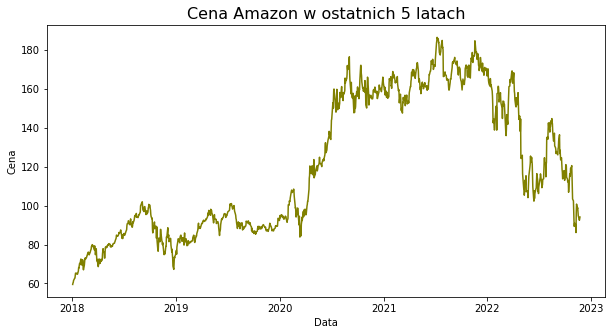

In [34]:
# Wykres liniowy jako jeden z najczęściej używanych wykresów, zwłaszcza dla analiz ekonomicznych.
#Możemy przeanalizować zmiany cen akcji na przestrzeni 5lat. Ekstrema naszej ceny akcji to 186.57 maksimum oraz minimum 59.45.
#Zmiana na typ datetime
df['Date'] = pd.to_datetime(df['Date'])
#Ustawiamy wielkość wykresu
plt.figure(figsize=(10,5))
#Tworzymy wykres i ustawiamy jego kolor
plt.plot(df['Date'], df['Price'], color = '#808000')
#Etykiety wykresów
plt.xlabel('Data')
plt.ylabel('Cena')
#Tytył wykresu
plt.title('Cena Amazon w ostatnich 5 latach', fontsize = 16)
#Rysujemy wykres
plt.show()


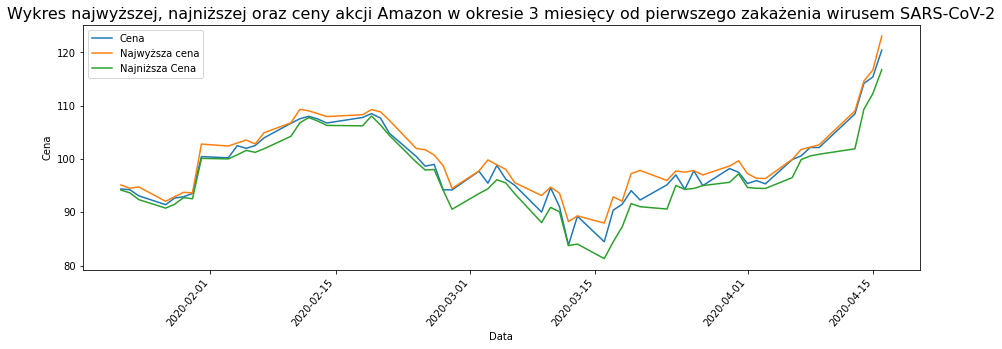

In [37]:
#Cena High i Low przedstawiona na jednym wykresie liniowym
#Stworzony slicing na okres 3 miesięcy od pierwszego zakażenia wirusem SARS-CoV-2
df3 = df.iloc[658:718]
#df1 = df.iloc[0:22]
#Zformatować daty 
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(15,5))
plt.plot(df3['Date'], df3['Price'], label='Cena')
plt.plot(df3['Date'], df3['High'], label='Najwyższa cena')
plt.plot(df3['Date'], df3['Low'], label='Najniższa Cena') 
#Etykiety osi
plt.xlabel('Data') 
plt.ylabel('Cena')
#Tytuł wykresu wraz z jego rozmiarem
plt.title('Wykres najwyższej, najniższej oraz ceny akcji Amazon w okresie 3 miesięcy od pierwszego zakażenia wirusem SARS-CoV-2', fontsize =16)
#Dokładamy legendę na nasz wykres
plt.legend()
#Wykorzystujemy dodatkową funkcję biblioteki matplotlib dla zaprezentowania dat na osi X z ukosem
plt.gcf().autofmt_xdate(bottom=0.2,rotation=50, ha='right')
plt.show()

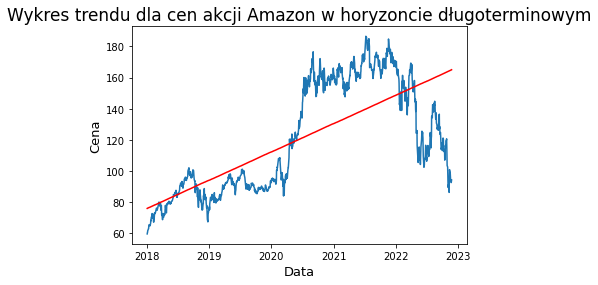

In [36]:
#Wykres ceny akcji z naniesionym trendem w horyzoncie długoterminowym
#Użyty wykres dla wizualizacji trendu, dzięki możliwości szybkiego oraz intuicyjnego rozeznania się w tendencji zmiennej względem czasu.
# Można zauważyć rosnące nachylenie w górę, ze względu na rosnące wartości danych.
# Trend wzrostowy rozpatrujemy jako pozytywny, z wartym rozważenia nabyciem akcji ze względu na podstawową zasadę większej szansy by ceny akcji szły nadal zgodnie z trendem.
plt.plot(df['Date'], df['Price'])
#Korzystamy z biblioteki Numpy oraz funkcji polyfit.1 -Wielomian stopnia pierwszego.
z = np.polyfit(range(len(df['Date'])), df['Price'], 1)
#Rysujemy linię trendu poprzez funkcję poly1d i plot
p = np.poly1d(z)
plt.plot(df['Date'], p(range(len(df['Date']))), 'r-')
#Etykiety osi oraz rozmiar
plt.xlabel('Data', fontsize = 13)
plt.ylabel('Cena', fontsize = 13)
#Tytuł wykresu oraz jego rozmiar
plt.title('Wykres trendu dla cen akcji Amazon w horyzoncie długoterminowym', fontsize = 17)
plt.show()

    

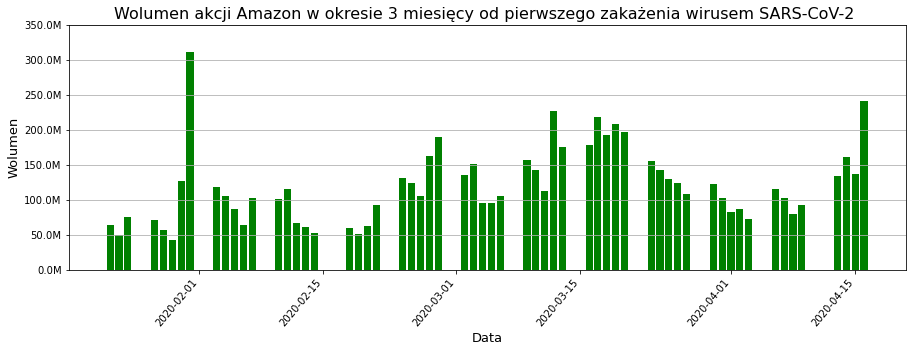

In [8]:
#Wybieramy dane na pierwsze 3 miesiące z naszego zbioru danych
df3 = df.iloc[658:718]
#Ustalenie rozmiaru wykresu
plt.figure(figsize=(15,5))

plt.bar(df3['Date'], df3['Vol.'], color = '#008000' )
plt.xlabel('Data', fontsize = 13)
plt.ylabel('Wolumen', fontsize = 13)
plt.title('Wolumen akcji Amazon w okresie 3 miesięcy od pierwszego zakażenia wirusem SARS-CoV-2 ',fontsize = 16)
# Ustawienie etykiety dat na ukos
plt.gcf().autofmt_xdate(bottom=0.2, rotation=50, ha='right')
# Ustawienie zakresu osi y
plt.ylim(0, 300000000)
# Ustawienie etykiet na osi y co 50milionów
yticks = range(0, 400000000, 50000000)
# Ustawienie etykiet jako M dla milionów
yticklabels = [str(y/1000000) + 'M' for y in yticks]
plt.yticks(yticks, yticklabels)
# Dodanie siatki do wykresu
plt.grid(axis='y')

plt.show()

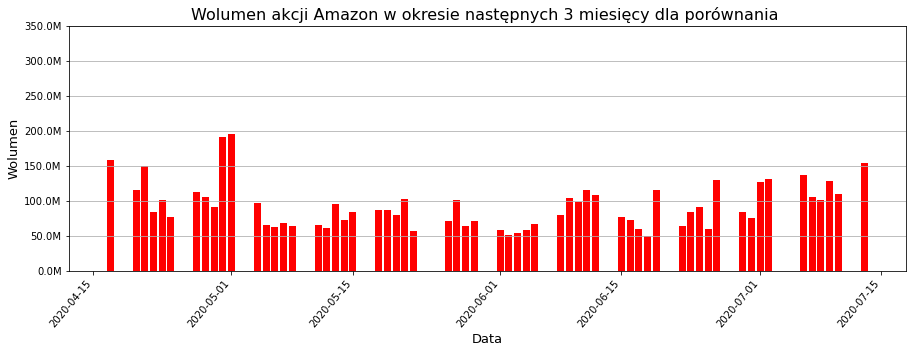

In [9]:
# Wybieramy dane na następne 3 miesiące z naszego zbioru danych
df4 = df.iloc[598:658]
#Ustalenie rozmiaru wykresu
plt.figure(figsize=(15,5))

plt.bar(df4['Date'], df4['Vol.'],  color = '#FF0000')
plt.xlabel('Data' ,fontsize = 13)
plt.ylabel('Wolumen', fontsize = 13)
plt.title('Wolumen akcji Amazon w okresie następnych 3 miesięcy dla porównania ',fontsize = 16)
# Ustawienie etykiety dat na ukos
plt.gcf().autofmt_xdate(bottom=0.2, rotation=50, ha='right')
# Ustawienie zakresu osi y
plt.ylim(0, 300000000)
# Ustawienie etykiet na osi y co 50milionów
yticks = range(0, 400000000, 50000000)
# Ustawienie etykiet jako M dla milionów
yticklabels = [str(y/1000000) + 'M' for y in yticks]
plt.yticks(yticks, yticklabels)
# Dodanie siatki do wykresu
plt.grid(axis='y')

plt.show()

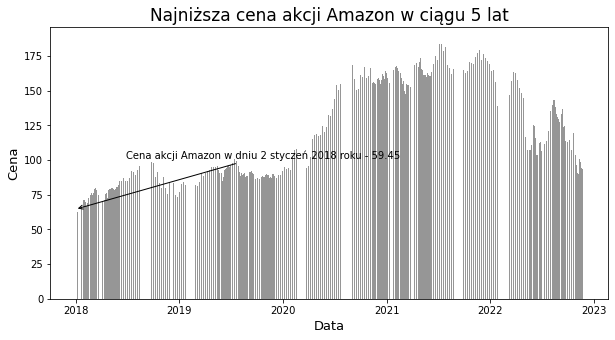

In [27]:
#Wykrs kolumnowy z wyszczególnieniem najniższej ceny akcji Amazon na przestrzeni 5 lat
df['Date'] = pd.to_datetime(df['Date'])


plt.figure(figsize=(10,5))
plt.bar(df['Date'], df['Price'], color = '#969696' )
#Podpisanie osi
plt.xlabel('Data', fontsize=13)
plt.ylabel('Cena', fontsize=13)
plt.title('Najniższa cena akcji Amazon w ciągu 5 lat', fontsize=17)
# DLa oznaczenia kluczowych informacji posłużymy się metodą .annotate(), generując tekst na wykresie wraz z pokazaniem strzałki
#określającej konkretny punkt na wykresie
plt.annotate('Cena akcji Amazon w dniu 2 styczeń 2018 roku - 59.45', xy=(df.loc[1233,'Date'].to_datetime64(), 0.33),#Ustawienie położenia współrzędnych
                     xycoords=('data','axes fraction'),
                     xytext=(50,50), textcoords='offset pixels', 
#Dodanie strzałki
                    arrowprops=dict(arrowstyle='->'))
plt.show()



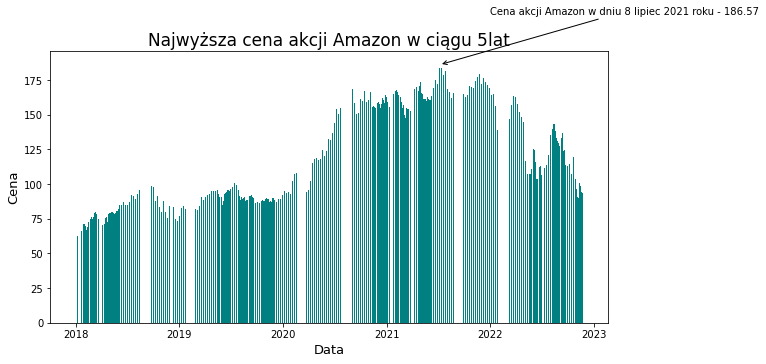

In [26]:
#Wykrs kolumnowy z wyszczególnieniem najwyższej ceny akcji Amazon na przestrzeni 5 lat
#Wykorzystanie biblioteki matplotlib
df['Date'] = pd.to_datetime(df['Date'])

#Rozmiar wykresu
plt.figure(figsize=(10,5))
#Tworzenie wykresu, nadanie koloru
plt.bar(df['Date'], df['Price'], color = '#008080' )
#Nadanie etykiet dla osi, rozmiar
plt.xlabel('Data', fontsize=13)
plt.ylabel('Cena', fontsize=13)
#Tytuł wykresu i rozmiar
plt.title('Najwyższa cena akcji Amazon w ciągu 5lat', fontsize=17)
# DLa oznaczenia kluczowych informacji posłużymy się metodą .annotate(), generując tekst na wykresie wraz z pokazaniem strzałki
#określającej konkretny punkt na wykresie
plt.annotate('Cena akcji Amazon w dniu 8 lipiec 2021 roku - 186.57',
             #Ustawienie położenia współrzędnych
             xy=(df.loc[349,'Date'].to_datetime64(), 0.95), #
                     xycoords=('data','axes fraction'),
                     xytext=(50,50), textcoords='offset pixels', 
#dodanie strzałki             
                    arrowprops=dict(arrowstyle='->'))
plt.show()

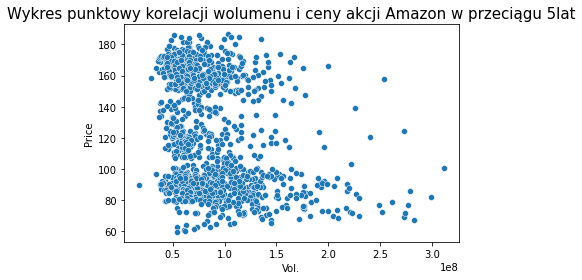

In [29]:
# Wykres punktowy korelacji danych
# Przedstawiona zostaje korelacja między zmiennymi wolumenu akcji i ich ceny. Położenie punktu na wykresie określają dwie zmienne.
# Można zauważyć, że obie zmienne są negatywnie skorelowane - wartość akcji rośnie kiedy wartość wolumenu maleje.
# Wczytanie danych
data = df[['Vol.', 'Price']]
# Rysowanie wykresu korelacji danych dla ceny i wolumenu
sns.scatterplot(x='Vol.', y='Price', data=data)
#Tytuł wykresu oraz jego rozmiar
plt.title("Wykres punktowy korelacji wolumenu i ceny akcji Amazon w przeciągu 5lat", fontsize =15 )
#Pokaż wykres
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Wykres gęstości  dla ceny akcji Amazon w przeciągu 5lat')

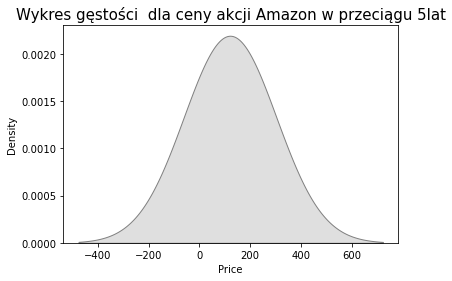

In [28]:
#Wykres gęstości dla ceny akcji
#Tego typu wykres użyjemy do zaprezentowania rozkładu zmiennej numerycznej. Zostaje lepiej określony kształt rozkładu niż w przypadku histogramu.
#Na wykresie możemy sprawdzić w jakim przedziale skoncentrowane są wartości cen akcji między 0 a 200.
#Dostosowanie wyglądu za pomocą funkcji kdeplot
sns.kdeplot(df['Price'], shade=True, bw=5, color = 'gray')
plt.title("Wykres gęstości  dla ceny akcji Amazon w przeciągu 5lat", fontsize =15 )




Text(0.5, 1.0, 'Wykres skrzypcowy dla ceny akcji Amazon w przeciągu 5lat')

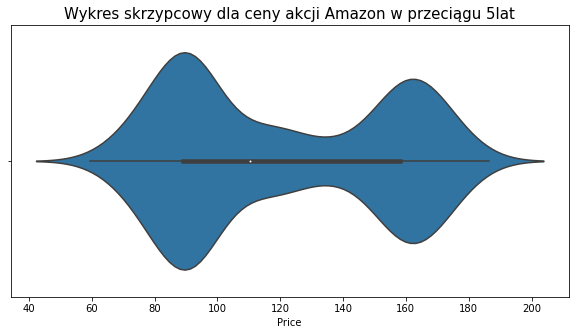

In [22]:
#Wykres skrzypcowy - Violin Plot
#DLa wygodniejszego wyświetlenia danych użyliśmy tego typu wykresu, który jest z pewnością ciekawszym i mniej spotykanym 
#spojrzeniem na dane. Możemy zwizualizować gęstość prawdopodobieństwa jak i rozkład.
#Obszar niebieski jest rozkładem gęstości. Środkowe zaznaczenie na czarno przedstawia Medianę naszego zbioru danych cen akcji Amazon.
#Lewy szczupły brzeg wykresu to minimum, a prawy szczupły brzeg to maksimum.
#Ustawiamy rozmiar wykresu
plt.figure(figsize=(10,5))
#Tworzymy wykres za pomocą biblioteki Seaborn
ax = sns.violinplot(x = df['Price'])
#Tytuł wykresu oraz jego rozmiar
plt.title("Wykres skrzypcowy dla ceny akcji Amazon w przeciągu 5lat", fontsize =15 )